# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


In [29]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


### Создание Dataframe

In [6]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

data = pd.DataFrame(list(zip(petersburg, magadan)), columns = ['petersburg', 'magadan'])

In [7]:
display(data)

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764


In [33]:
mean_spb = statistics.mean(data.petersburg)
mean_mgd = statistics.mean(data.magadan)
if mean_spb - mean_mgd  > 0:
    print('Средний размер у петербуржцев больше магаданцев')
elif mean_spb - mean_mgd < 0:
    print('Средний размер у петербуржцев меньше магаданцев')
else:
    print('Средние размеры одинаковые')
    

Средний размер у петербуржцев больше магаданцев


### Проверка данных на нормальность


In [13]:
H0 = 'Данные распределены нормально' # Нулевая гипотеза
HA = 'Данные не распределены нормально (мы отвергаем H0)' # Альтернативная гипотеза
alpha = 0.05 # Уровень значимости

In [14]:
# Тест Шапиро-Уилка
p_val_sh = shapiro(data)[1]
if p_val_sh > alpha:
    print(f'{H0}, так как p-values ({p_val_sh}) больше уровня значимости ({alpha})')
else:
	print(f'{HA}, так как p-values ({p_val_sh}) меньше уровня значимости ({alpha})')

Данные распределены нормально, так как p-values (0.2256876528263092) больше уровня значимости (0.05)


Проверить гипотезу нормальности распределения данный при помощи **теста Д’Агостино** не представляется возможным, так как согласно [документации модуля skypy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html) в выборке должно быть не менее 8 значений.


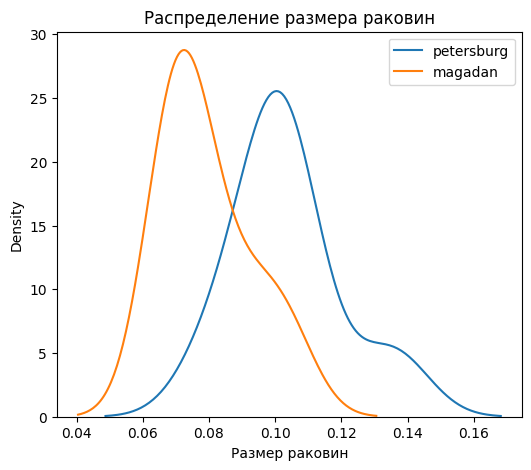

In [26]:
# графическая проверка нормальности
col_val = ['petersburg', 'magadan']
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 5))
ax1.set_title('Распределение размера раковин')

for col in col_val:
       sns.kdeplot(data[col], ax=ax1, label=col)
       
plt.xlabel('Размер раковин')
plt.legend();


**Вывод:**

Оба признака датафрейма имею распределение близкое к нормальному

### Выявление зависимости переменных

Обе переменные числовые и распределены нормально, поэтому для проверки корреляци между ними используем тест **Пирсона**

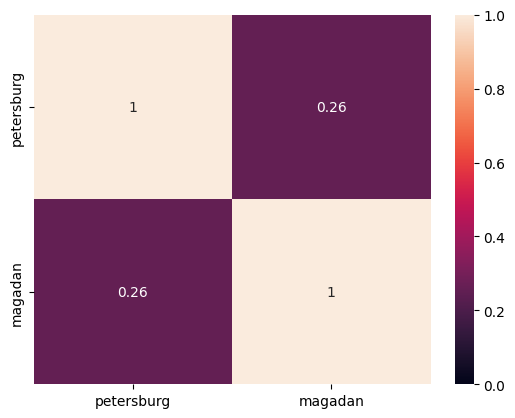

In [36]:
# Визуализация матрицы кррелярности
sns.heatmap(data.corr(), annot = True, vmin=0, vmax=1);

**Вывод:**

Коэффициент коррелиции Присона (0.26) между исследуемыми переменными показывает очень слабую зависсимость между ними.   

### Сравнение раковин мидий

In [ ]:
H0 = 'Средние значения размеров раковин мидий, выращенных в двух разных местах, равны' # Нулевая гипотеза
HA = 'Среднее значение размеров раковин мидий из одного места больше, чем из другого' # Альтернативная гипотеза
alpha = 0.05 # Уровень значимости

Для проверки нашей нулевой гипотезы необходимо прибегнуть к **параметрическим тестам**, так как распеределение данных близко к гауссовскому (нормальному распределению). Выбираем **тест на сравнение выборок**, в виде того, что сравниваем количественные переменные. Отвергнуть или не отвергать нулевую гипотезу нам поможет **независимый T-критерий Стюдента (t-тест)**, так как групп для сравнения всего две (магаданские и петербуржские), они независимы друг от друга, а объём каждой из них не превышает 30 (по 7 в каждой).

**Независимый T-критерий Стюдента**

In [37]:
p_val_t = round(ttest_ind(data.petersburg, data.magadan, equal_var=True)[1],2)
if p_val_t > alpha:
    print(f'Нулевая гипотеза не отвергается, так как статистическое значение {p_val_t} превысило уровень значимости {alpha}')
else:
    print(f'Нулевая гипотеза отвергается, так как статистическое значение {p_val_t} меньше уровеня значимости {alpha}')

Нулевая гипотеза отвергается, так как статистическое значение 0.01 меньше уровеня значимости 0.05


**Вывод:**

Проведенное статистическое исследование выборок показало, что средние размеры петербуржцев и магаданцев не равны 